<a href="https://colab.research.google.com/github/valesierrai/Analitica-de-Negocios/blob/main/5_Modelos_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelo ADALINE** Este modelo busca el pronóstico del Score para un grupo de solicitantes de crédito

0. Se procede con las cargas de la librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf


Mounted at /content/drive


1. Se procede con la carga de la base de datos

In [ ]:
XDB=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Analítica de Negocios/0. SolicitantesCrédito(USD).xlsx',sheet_name=1)
XDB=XDB[['Edad','Ingresos','Egresos','Monto (EAD)','Score']]
XDB=XDB.dropna()

#Se cargan los datos en bruto
XD=np.array(XDB[['Edad','Ingresos','Egresos','Monto (EAD)']])
yd=np.array(XDB[['Score']])

#Procedemos con la normalización
XDn=XD/np.max(XD,axis=0) #Axis=0 busca el max por columnas
ydn=yd/np.max(yd,axis=0)

2. Procedemos a implementar nuestro primer modelo neuronal-ADALINE (Adaptive Linear)

In [ ]:
NE=4 #Definimos número de entradas
model=Sequential() #Cortex Cerebrales

model.add(Dense(1, activation='linear', use_bias=False, input_dim=NE))
model.compile(optimizer='adam', loss='mse')  #Mean Square Error  #Adam= la regla en descenso
history=model.fit(XDn,ydn, epochs=100, batch_size=580) #Recorre la tabla 100 veces pero cada vez que lo hace elimina el 10% de los datos
ys=model.predict(XDn)


Epoch 1/100
11/11 [==============================] - 1s 7ms/step - loss: 0.7666
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.7440
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.7219
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 0.7003
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6791
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6586
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6383
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6187
Epoch 9/100
11/11 [==============================] - 0s 4ms/step - loss: 0.5995
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5810
Epoch 11/100
11/11 [==============================] - 0s 4ms/step - loss: 0.5628
Epoch 12/100
11/11 [==============================] - 0s 4ms/step - loss: 0.5453
Epoch 13/100
11/11 [=================

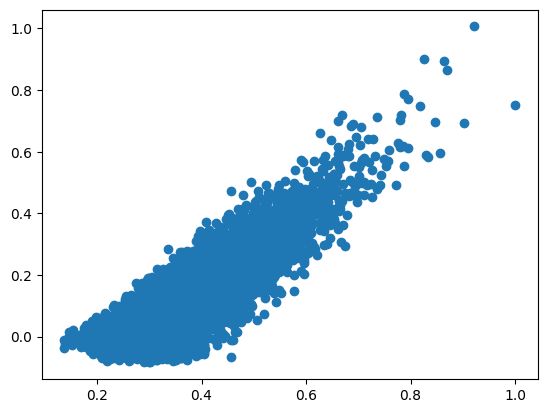

In [ ]:
#Gráfico de Dispersión
plt.figure()
plt.scatter(ydn,ys)
plt.show()

In [ ]:
#Matriz de Correlación
df=pd.DataFrame(np.column_stack((ydn,ys)))
df.corr()

,0,1
0,1.000000,0.850822
1,0.850822,1.000000


In [ ]:
#Efectos Independientes
W=model.layers[0].get_weights()

<Figure size 640x480 with 0 Axes>

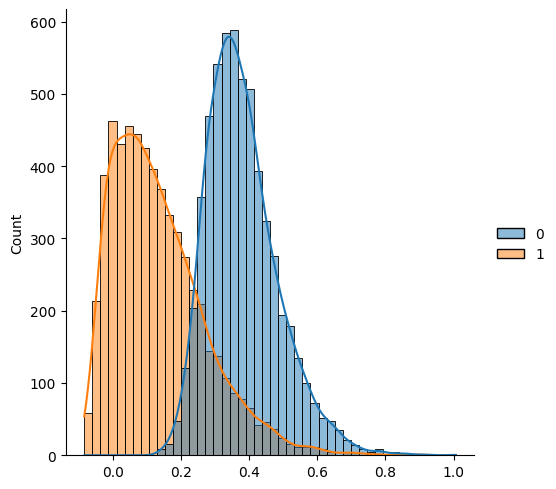

In [ ]:
#Como son las distribuciones de los datos
plt.figure()
sns.displot((ydn.flatten(),ys.flatten()),kde=True)
plt.show()

In [ ]:
#Como predecir una nueva persona
ys_np=model.predict([[34/73,1200/2994,500/3141,800/4075]]) #Tengo que normalizar los datos (dividiendo por los máximos)
np.max(XD, axis=0) #Máx de cada columna

1/1 [==============================] - 0s 56ms/step


array([  73.        , 2994.88475   , 3141.73933333, 4075.51283478])

3. Modelo MADALINE (Multi-Adaptive Linear)

In [ ]:
NE=4 #Definimos número de entradas
model=Sequential() #Cortex Cerebrales
model.add(Dense(10, activation='linear', use_bias=False, input_dim=NE))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam', loss='mse')  #Mean Square Error  #Adam= la regla en descenso
history=model.fit(XDn,ydn, epochs=1000, batch_size=584) #Recorre la tabla 100 veces pero cada vez que lo hace elimina el 10% de los datos
ys1=model.predict(XDn)

Epoch 1/1000
11/11 [==============================] - 1s 2ms/step - loss: 0.0875
Epoch 2/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 3/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.0329
Epoch 4/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 5/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 6/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 7/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 8/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 9/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 10/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 11/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 12/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 13/1000
11/11 [====

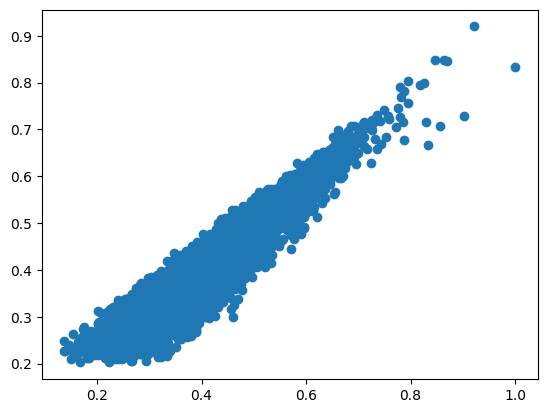

In [ ]:
#Gráfico de Dispersión
plt.figure()
plt.scatter(ydn,ys1)
plt.show()

In [ ]:
#Matriz de Correlación
df=pd.DataFrame(np.column_stack((ydn,ys1)))
df.corr()

,0,1
0,1.000000,0.932774
1,0.932774,1.000000


In [ ]:
#Efectos Independientes
W2=model.layers[0].get_weights()[0]
C2=model.layers[1].get_weights()[0]

np.dot(W2,C2)


<Figure size 640x480 with 0 Axes>

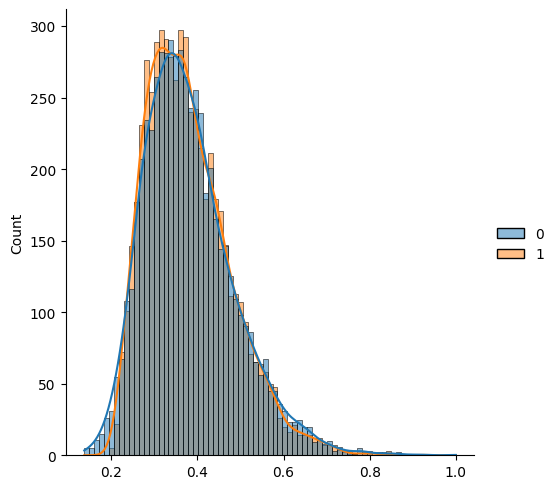

In [ ]:
#Como son las distribuciones de los datos
plt.figure()
sns.displot((ydn.flatten(),ys1.flatten()),kde=True)
plt.show()